# Leicester's Unprecedented Title Win

### By Rodney Amor

## 1. Introduction

The English Premier League (EPL) is the highest level of the English football league system. Founded in 1992, the EPL quickly surged to become the most popular and the most commercially successful football league in the world. It consists of 20 teams who compete for the league title and avoid relegation to the Championship.

The league boasts itself as the most competitive league in the world where any team can beat anyone. While only 6-teams, Manchester United, Manchester City, Chelsea, Arsenal, Tottenham Spurs, and Liverpool, can consistently finish in the top positions, that premise still holds.
Leicester City's win of the English Premier League in the 2015/16 season is one of the most remarkable events of sports history. It is one of those rare and shocking sports events where a team wins a game or a trophy even when the odds are overwhelmingly against them. In Leicester's case, they had a 5000-to-1 chance of becoming the league champions. Their victory is even more impressive when the fact that only five teams have been named winners since the league's founding in 1992. Four of those teams, Manchester United, Manchester City, Chelsea, and Arsenal, outspend Leicester on payroll and transfers. Leicester has only about a quarter of the financial resources compared to those teams.

In this tutorial, we will look at the factors that led to Leicester's league title. Did they have an unstoppable attacking, a creative midfield, or an unbreakable defense? Were they aggressive? What kind of tactic did they use? Is Leicester's title win due to years of progression, or was it a special one-time event? Are they on the rise to be one of the top teams? We will gather football data to determine the team's performance and where they excelled. 

## 2. Getting Started

Below are the libraries that we will be using.

In [1]:
import requests
import numpy as np
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Collecting and Tidying Up Data

We will be scraping our data from various sources since most sources only cover a portion of what we need. For example, we will scrape one source for attacking data and another for defensive data as shown in the cell below.

To organize our data, we will have different data frames for each portion of the data. Thankfully, our data is already organized since we are already scrapping different websites. Each website will have its data frame. 

### 3a. League Data

The first table of concern will be league data. As we can see below, the table contains lots of NaN data. This is because of the way the table on the website was set up which caused extra columns of NaN to be created when we scrape the website, which means no data was missing. Also, the first two rows appear to contain the names of the respective columns. The most important data in this data frame is team, win, draws, defeats, home wins, away wins, goals scored, goals conceded, goal difference, and league points.

In [2]:
#W/D/L Home, Away, and Overall
url = 'https://www.sportsmole.co.uk/football/premier-league/2015-16//table.html'
r = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv:42.0) Gecko/20100101 Firefox/42.0'})
league_data = BeautifulSoup(r.content).find('table')
league_table = pd.read_html(league_data.prettify())
league_df = pd.DataFrame(league_table[0])
league_df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,NaN,NaN,NaN,NaN,Home,Home,Home,Home,Home,NaN,...,Away,NaN,Overall,Overall,Overall,Overall,Overall,NaN,NaN,NaN
1,NaN,Team,P,NaN,W,D,L,F,A,NaN,...,A,NaN,W,D,L,F,A,NaN,GD,PTS PT
2,C,Leicester City Leicester,38,NaN,12,6,1,35,18,NaN,...,18,NaN,23,12,3,68,36,NaN,32,81
3,2,Arsenal,38,NaN,12,4,3,31,11,NaN,...,25,NaN,20,11,7,65,36,NaN,29,71
4,3,Tottenham Hotspur Spurs,38,NaN,10,6,3,35,15,NaN,...,20,NaN,19,13,6,69,35,NaN,34,70


Here we will get rid of the first two rows. The resulting table has numbered column names that are not very helpful. We will have to rename these.

In [3]:
#Tidying up data
league_df = league_df.drop([0, 1])
league_df = league_df.reset_index(drop=True)
league_df = league_df.dropna(how='all', axis=1)

#The columns are
#Position, Team, Games played, 
#Home wins, Home draws, Home defeats, Home goals scored, Home goals conceded,
#Away wins, Away draws, Away defeats, Away goals scored, Away goals conceded,
#Total wins, Total draws, Total defeats, Total goals scored, Total goals conceded,
#Goal difference, Points
league_df = league_df.rename(columns={0: 'Position', 1: 'Team', 2: 'Games played', 4: 'Home wins', 5: 'Home draws',\
                                      6: 'Home defeats', 7: 'Home goals scored', 8: 'Home goals conceded',\
                                      10: 'Away wins', 11: 'Away draws', 12: 'Away defeats', 13: 'Away goals scored',\
                                      14: 'Away goals conceded', 16: 'Total wins', 17: 'Total draws',\
                                      18: 'Total defeats', 19: 'Total goals scored', 20: 'Total goals conceded',\
                                      22: 'Goal Difference', 23: 'Points'})

league_df = league_df.drop(columns=['Games played', 'Home wins', 'Home draws', 'Home defeats', 'Home goals scored',\
                                    'Home goals conceded', 'Home wins', 'Away draws', 'Away defeats',\
                                    'Away goals scored', 'Away goals conceded'])
league_df.head()


,Position,Team,Away wins,Total wins,Total draws,Total defeats,Total goals scored,Total goals conceded,Goal Difference,Points
0,C,Leicester City Leicester,11,23,12,3,68,36,32,81
1,2,Arsenal,8,20,11,7,65,36,29,71
2,3,Tottenham Hotspur Spurs,9,19,13,6,69,35,34,70
3,4,Manchester City Man City,7,19,9,10,71,41,30,66
4,5,Manchester United Man Utd,7,19,9,10,49,35,14,66


The C in the first row means champions.

### 3b. Possession Data

The next table of concern contains possession data. Like the table above, the table below also contains lots of NaN data. Unlike the first website, this website actually contains missing data. However, we don't need any of them. We only want the possession percentages. Also, the first 20 rows are redundant.

In [4]:
#posession
url = 'https://fbref.com/en/comps/9/1467/possession/2015-2016-Premier-League-Stats'
r = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'})
data = BeautifulSoup(r.content).find('table')
table = pd.read_html(data.prettify())
possession_df = pd.DataFrame(table[0])
possession_df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
               Squad               # Pl               Poss                90s   
0         vs Arsenal                 25               41.7               38.0   
1     vs Aston Villa                 29               53.6               38.0   
2     vs Bournemouth                 28               48.8               38.0   
3         vs Chelsea                 28               43.8               38.0   
4  vs Crystal Palace                 30               54.2               38.0   

  Touches                                          ... Dribbles      Carries  \
  Touches Def Pen Def 3rd Mid 3rd Att 3rd Att Pen  ...      #Pl Megs Carries   
0     NaN     NaN     NaN     NaN     NaN     NaN  ...      NaN  NaN     NaN   
1     NaN     NaN     NaN     NaN     NaN     NaN  ...      NaN  NaN     NaN   
2     NaN     NaN     NaN     NaN     NaN     NaN  ...      NaN  NaN     NaN   
3     NaN     NaN     NaN     NaN     NaN     NaN  ...      NaN  NaN     NaN   
4     NaN     NaN     NaN     NaN     NaN     NaN  ...      NaN  NaN     NaN   

                  Receiving          Unnamed: 22_level_0 Unnamed: 23_level_0  
  TotDist PrgDist      Targ Rec Rec%              Miscon              Dispos  
0     NaN     NaN       NaN NaN  NaN                 NaN                 NaN  
1     NaN     NaN       NaN NaN  NaN                 NaN                 NaN  
2     NaN     NaN       NaN NaN  NaN                 NaN                 NaN  
3     NaN     NaN       NaN NaN  NaN                 NaN                 NaN  
4     NaN     NaN       NaN NaN  NaN                 NaN                 NaN  

[5 rows x 24 columns]

Here we will remove the first 20 rows, all columns with NaN, and redundant info.

In [5]:
#removing the first two rows
possession_df = possession_df.drop([0, 1])
possession_df = possession_df.reset_index(drop=True)
possession_df = possession_df.dropna(how='all', axis=1)

#removing redundant rows
possession_df = possession_df.drop(possession_df.index[0:18])
possession_df = possession_df.reset_index(drop=True)

#renaming columns
possession_df.columns = possession_df.columns.get_level_values(1)
possession_df = possession_df.rename(columns={'Squad': 'Team'})

#removing redundant column
possession_df = possession_df.drop(columns=['# Pl', '90s'])

possession_df.head()

,Team,Poss
0,Arsenal,58.3
1,Aston Villa,46.4
2,Bournemouth,51.2
3,Chelsea,56.2
4,Crystal Palace,45.8


### 3c. Defensive Data

The table below contains defensive stats. The most important data from this table is clean sheets.

In [6]:
#Defensive stats
#Goal against, goal against / game, clean sheets
url = 'https://www.sportsmole.co.uk/football/premier-league/2015-16/best-defence.html'
r = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'})
defensive_data = BeautifulSoup(r.content).find('table')
defensive_table = pd.read_html(defensive_data.prettify())
defensive_df = pd.DataFrame(defensive_table[0])
defensive_df.head()

,0,1,2,3,4
0,NaN,Team,Goals against,Avg per game,Clean Sheets
1,1.0,Manchester United,35,0.92,18
2,2.0,Tottenham Hotspur,35,0.92,13
3,3.0,Arsenal,36,0.95,18
4,4.0,Leicester City,36,0.95,15


As we can see from this table, the first row contains the name of the columns while the column names themselves are numbers. We will have to rename the columns and remove the first column.

In [7]:
#drop first row
defensive_df = defensive_df.drop([0])
defensive_df = defensive_df.reset_index(drop=True)

#renaming the columns
defensive_df = defensive_df.drop(columns=[0])
defensive_df = defensive_df.rename(columns={1: 'Team', 2: 'Goals against', 3: 'Goals conceded per game', 4: 'Clean sheets'})

defensive_df.head()

,Team,Goals against,Goals conceded per game,Clean sheets
0,Manchester United,35,0.92,18
1,Tottenham Hotspur,35,0.92,13
2,Arsenal,36,0.95,18
3,Leicester City,36,0.95,15
4,Manchester City,41,1.08,16


### 3d. Miscellaneous Data

The Premier League website contains most of the data that we need. However, it's difficult to get the data from the 2015/16 season using simple web scrapping methods since the website doesn't appear to be static. Rather, it appears that the data is loaded from a server that always defaults into the 2020/21 season when we scrape it even if we have the link for a different season. Since we already have most of the data we need from website scrapping, we will copy the rest of what we need from the Premier League website into an excel file and convert that into a CSV file.

This table contains the number of passes, saves, shots, tackles, yellow cards, and red cards.

In [8]:
extra_df = pd.read_csv("premier_league_stats.csv") 
extra_df.head()

,Team,Passes,Shots,Saves,Tackles,Yellow Cards,Red Cards
0,Arsenal,"21,249",571,118,709,40,4
1,Manchester City,"20,488",615,86,729,61,0
2,Manchester United,"20,070",430,90,760,65,1
3,Liverpool,"19,733",629,81,871,61,3
4,Chelsea,"19,664",526,122,790,58,5


To make graphing easier, we are going to trim away the hundreds, tens, and one's place of the number of passes. 

In [9]:
#for removing SettingWithCopyWarning
pd.options.mode.chained_assignment = None

#simplify the data
for index, row in extra_df.iterrows():
    extra_df['Passes'][index] = row['Passes'][:2]
    
extra_df = extra_df.rename(columns={'Passes': 'Passes (in thousands)'})
extra_df.head()

,Team,Passes (in thousands),Shots,Saves,Tackles,Yellow Cards,Red Cards
0,Arsenal,21,571,118,709,40,4
1,Manchester City,20,615,86,729,61,0
2,Manchester United,20,430,90,760,65,1
3,Liverpool,19,629,81,871,61,3
4,Chelsea,19,526,122,790,58,5


### 3f. League Positions

We will now look at Leicester's league positioning the past few years. Leicester was in Championship a few seasons ago but we are not going to look at that.

In [10]:
#W/D/L Home, Away, and Overall
url = 'https://en.wikipedia.org/wiki/List_of_Leicester_City_F.C._seasons'
r = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv:42.0) Gecko/20100101 Firefox/42.0'})
data = BeautifulSoup(r.content).find('table')
table = pd.read_html(data.prettify())
lc_standings_df = pd.DataFrame(table[0])
lc_standings_df.head()

Season                          League                                  \
    Season                        Division                               P   
0  1890–91  No League appearances recorded  No League appearances recorded   
1  1891–92         Midland Football League                              20   
2  1892–93         Midland Football League                              24   
3  1893–94         Midland Football League                              20   
4  1894–95                           Div 2                              30   

                                                                   \
                                W                               D   
0  No League appearances recorded  No League appearances recorded   
1                               5                               3   
2                              12                               3   
3                              15                               2   
4                              15                               8   

                                                                   \
                                L                              GF   
0  No League appearances recorded  No League appearances recorded   
1                              12                              21   
2                               9                              50   
3                               3                              49   
4                               7                              72   

                                                                   \
                               GA                             Pts   
0  No League appearances recorded  No League appearances recorded   
1                              56                              13   
2                              37                              27   
3                              13                              32   
4                              53                              38   

                                  FA Cup League  Cup Europe  / Other  \
                              Pos FA Cup League  Cup Europe  / Other   
0  No League appearances recorded     1Q         NaN             NaN   
1                            11th     1Q         NaN             NaN   
2                             4th     3Q         NaN             NaN   
3                             2nd     R2         NaN             NaN   
4                             4th     R1         NaN             NaN   

                    Top goalscorer(s)  [a]        
  Europe  / Other.1                   Name Goals  
0               NaN                    NaN   NaN  
1               NaN            Jimmy Atter     6  
2               NaN          Billy Dorrell    15  
3               NaN            Jimmy Brown    16  
4               NaN             David Skea    31

As we can see from the table above, Leicester City has a long history dating back to 1890. We are only going to get the seasons when they were in the Premier League.

In [11]:
cols = lc_standings_df.columns.get_level_values(1)
lc_standings_df.columns = cols
lc_standings_df = lc_standings_df[lc_standings_df['Division'] == 'Prem']

lc_standings_df = lc_standings_df.reset_index(drop=True)

lc_standings_df = lc_standings_df.drop(columns=['P', 'W', 'D', 'L', 'GF', 'GA', 'Pts', 'FA Cup', 'League  Cup', \
                                               'Europe  / Other', 'Europe  / Other.1', 'Name', 'Goals'])
print(lc_standings_df)

     Season Division       Pos
0   1994–95     Prem      21st
1   1996–97     Prem       9th
2   1997–98     Prem      10th
3   1998–99     Prem      10th
4   1999–00     Prem       8th
5   2000–01     Prem      13th
6   2001–02     Prem      20th
7   2003–04     Prem      18th
8   2014–15     Prem      14th
9   2015–16     Prem  1st  [h]
10  2016–17     Prem      12th
11  2017–18     Prem       9th
12  2018–19     Prem       9th
13  2019–20     Prem       5th


As you can see from the table above, Leicester City was in the Premier League for most of the 90s and early 2000s but dropped into the lower divisions in the mid-2000s. They would not return to the Premier League until the 2014/15 season. We are going to be looking at Leicester City's standings from the 2014/15 season to today and determine their trajectory.

In [12]:
lc_standings_df = lc_standings_df.iloc[[8, 9, 10, 11, 12, 13]]

#The 2015/16 season is '1st  [h]' which is wierd
#Going to change it to '1st'
lc_standings_df.iloc[1]['Pos'] = '1st'

#removing letters to make graphing possible
#trimming season to make graphing possible, eg. 2014/15 -> 2014
for index, row in lc_standings_df.iterrows():
    if len(row['Pos']) == 3:
        lc_standings_df['Pos'][index] = int(row['Pos'][:1])
    else:
        lc_standings_df['Pos'][index] = int(row['Pos'][:2])
    lc_standings_df['Season'][index] = int(row['Season'][0:4])
lc_standings_df.head()

,Season,Division,Pos
8,2014,Prem,14
9,2015,Prem,1
10,2016,Prem,12
11,2017,Prem,9
12,2018,Prem,9


## 4. Exploratory Analysis and Data Visualization

Now we begin analyzing our data. Graphs will be set up so that team names will be on the y-axis so that we can see their full names. On the x-axis, we will have specific statistics such as the number of goals scored. The x-axis will be in ascending order. Leicester City will be highlighted as a red dot to make spotting easier.

### 4a. Attacking Statistics

First, we are going to look at Leicester's attacking statistics. We can go in-depth here but we only need to look at goals scored and the number of shots compared to other teams to determine how good Leicester City's attack was in 2015/16.

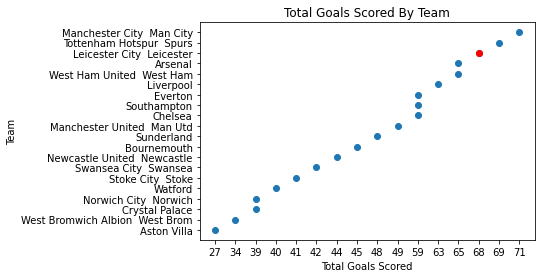

In [13]:
#Check number of goals scored
fig, ax = plt.subplots()
league_df.sort_values(by=['Total goals scored'], inplace=True)
ax.scatter(x=league_df['Total goals scored'], y=league_df['Team'])

lc = league_df[league_df['Team'] == 'Leicester City  Leicester']

ax.scatter(x=lc['Total goals scored'], y=lc['Team'], c='red')
plt.title("Total Goals Scored By Team")
plt.xlabel("Total Goals Scored")
plt.ylabel("Team")
plt.show()

As we can see from this plot, Leicester City had the third-highest goals scored scoring 68 goals that season. 

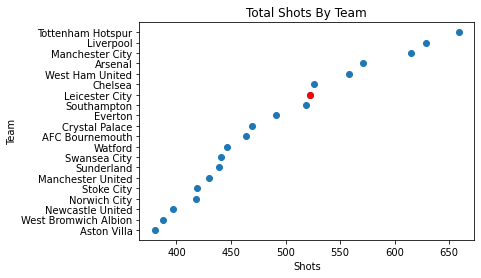

In [14]:
#Check number of shots
fig, ax = plt.subplots()
extra_df.sort_values(by=['Shots'], inplace=True)
ax.scatter(x=extra_df['Shots'], y=extra_df['Team'])

lc = extra_df[extra_df['Team'] == 'Leicester City']

ax.scatter(x=lc['Shots'], y=lc['Team'], c='red')
plt.title("Total Shots By Team")
plt.xlabel("Shots")
plt.ylabel("Team")
plt.show()

Leicester City had 522 shots in the 2015/16 season which is the 7th highest. From the two graphs, we can conclude that Leicester City had clinical finishers on the team. In terms of the number of shots, they were not in the top 5 yet they were 3rd in the number of goals scored. In other words, they were some of the more efficient teams in terms of the number of shots per goal.

### 4b. Defensive Statistics

Now we're going to look at how good Leicester's defense was.

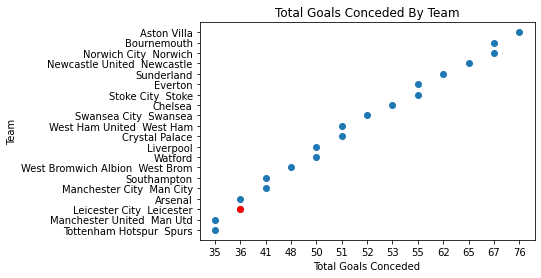

In [15]:
#Check number of goals conceded
fig, ax = plt.subplots()
league_df.sort_values(by=['Total goals conceded'], inplace=True)
ax.scatter(x=league_df['Total goals conceded'], y=league_df['Team'])

lc = league_df[league_df['Team'] == 'Leicester City  Leicester']

ax.scatter(x=lc['Total goals conceded'], y=lc['Team'], c='red')
plt.title("Total Goals Conceded By Team")
plt.xlabel("Total Goals Conceded")
plt.ylabel("Team")
plt.show()

We can see from the above that Leicester had the third-lowest goals conceded only letting 36 goals past the defense.

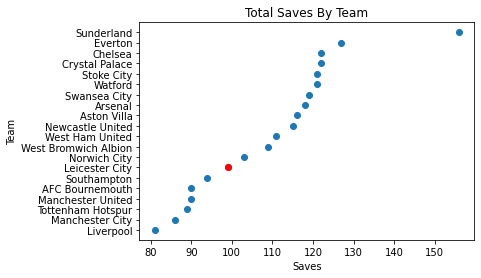

In [16]:
fig, ax = plt.subplots()
extra_df.sort_values(by=['Saves'], inplace=True)
ax.scatter(x=extra_df['Saves'], y=extra_df['Team'])

lc = extra_df[extra_df['Team'] == 'Leicester City']

ax.scatter(x=lc['Saves'], y=lc['Team'], c='red')
plt.title("Total Saves By Team")
plt.xlabel("Saves")
plt.ylabel("Team")
plt.show()

From the plot above, we can see that Leicester did not have as many saves as the other teams. This suggests that Leicester's defensive success was mostly due to solid defenders rather than a great goalkeeper. This implies that Leicester's defenders were successful in preventing opposing teams from getting a shot which required a goalkeeper's intervention.

### 4c. Possesion Numbers

We are now going to look at possession numbers, mainly possession percentages and number of passes.

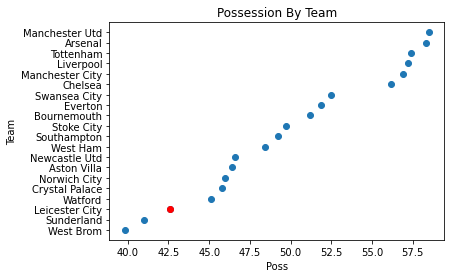

In [17]:
fig, ax = plt.subplots()
possession_df.sort_values(by=['Poss'], inplace=True)
ax.scatter(x=possession_df['Poss'], y=possession_df['Team'])

lc = possession_df[possession_df['Team'] == 'Leicester City']

ax.scatter(x=lc['Poss'], y=lc['Team'], c='red')
plt.title("Possession By Team")
plt.xlabel("Poss")
plt.ylabel("Team")
plt.show()

We can see from the graph that with approximately 42% possession, keeping the ball was not Leicester's strong points.

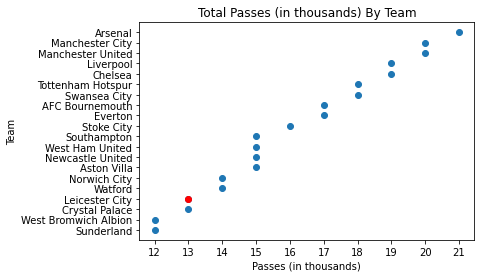

In [18]:
fig, ax = plt.subplots()
extra_df.sort_values(by=['Passes (in thousands)'], inplace=True)
ax.scatter(x=extra_df['Passes (in thousands)'], y=extra_df['Team'])

lc = extra_df[extra_df['Team'] == 'Leicester City']

ax.scatter(x=lc['Passes (in thousands)'], y=lc['Team'], c='red')
plt.title("Total Passes (in thousands) By Team")
plt.xlabel("Passes (in thousands)")
plt.ylabel("Team")
plt.show()


Again, we can see that possession was not a strength that Leicester possessed only being able to do 13k passes throughout the season.

### 4d. Agression Numbers

Next, we are going to look at how aggressive and how successful Leicester was in winning back possession.

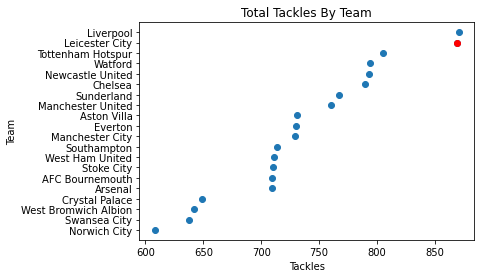

In [19]:
fig, ax = plt.subplots()
extra_df.sort_values(by=['Tackles'], inplace=True)
ax.scatter(x=extra_df['Tackles'], y=extra_df['Team'])

lc = extra_df[extra_df['Team'] == 'Leicester City']

ax.scatter(x=lc['Tackles'], y=lc['Team'], c='red')
plt.title("Total Tackles By Team")
plt.xlabel("Tackles")
plt.ylabel("Team")
plt.show()

As we can see from the plot above, Leicester was one of the best teams at winning back possession losing only to Liverpool.

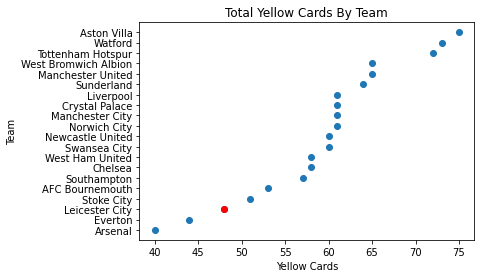

In [20]:
fig, ax = plt.subplots()
extra_df.sort_values(by=['Yellow Cards'], inplace=True)
ax.scatter(x=extra_df['Yellow Cards'], y=extra_df['Team'])

lc = extra_df[extra_df['Team'] == 'Leicester City']

ax.scatter(x=lc['Yellow Cards'], y=lc['Team'], c='red')
plt.title("Total Yellow Cards By Team")
plt.xlabel("Yellow Cards")
plt.ylabel("Team")
plt.show()

We can see from the graph above that Leicester had the third-lowest yellow cards received. This combined with the fact that they had the second-highest successful tackles implies that they were very good at winning the ball back without committing a foul.

### 4e. Tactical Analysis

From the plots above, we've learned that Leicester was one of the most successful attacking teams while having a solid defense and being successful in winning the ball back. We also know that possession was not a strong suit having one of the lowest possession percentages as well as one of the lowest number of successful passes. This means that Leicester employed an aggressive fast-paced counter-attacking tactic.

Counter-attacking is a playstyle where when a team wins the ball, they immediately start attacking. When the opposing team losses possession of the ball, they transition from an attacking formation to a defensive one. The counter-attacking team immediately starts attacking as the transition takes place when the opposing is not yet ready to get back into defending. Counter-attacking has been employed recently by teams who have won league titles such as Manchester City who won the Premier League twice in 2017/18 and 2018/19 and Liverpool in 2019/20.

Leicester's tactics revolve around aggressively trying to win back the ball then counter immediately with fast-paced players when they do so.

### 4f. Is Leicester City on track to becoming a top team? Can they win the league again?

In this section, we are going to look at Leicester's performance in the Premier League in the past few seasons. Since Leicester was in the Championship a few seasons ago, we are only going to look at their league placements between then and now. With this data, we are going to look at Leicester's trajectory to determine whether they are getting better or worse and whether they are on track to win the title again. We have their league standings since 2014, we are going to make a scatter plot out of it and create a linear regression model.

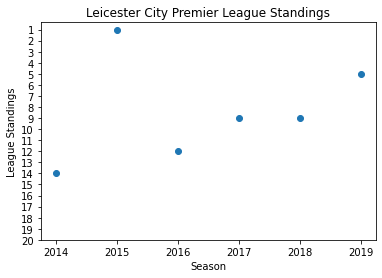

In [21]:
fig, ax = plt.subplots()
ax.scatter(x=lc_standings_df['Season'], y=lc_standings_df['Pos'])

lc = lc_standings_df[lc_standings_df['Season'] == '2015']
ax.scatter(x=lc['Season'], y=lc['Pos'], c='red')

plt.title("Leicester City Premier League Standings")
plt.xlabel("Season")
plt.ylabel("League Standings")
plt.gca().invert_yaxis()
plt.yticks(range(1, 21))
plt.show()


Slope:  -0.6857142857144376
Y-intercept:  1391.076190476496


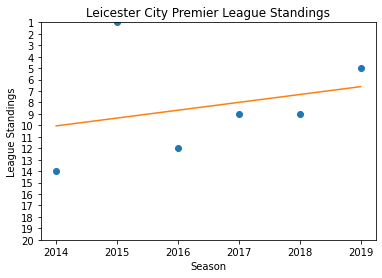

In [22]:
x = np.array(lc_standings_df['Season'].tolist())
y = np.array(lc_standings_df['Pos'].tolist())


plt.yticks(range(1, 21))
plt.ylim(20, 1)
plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.title("Leicester City Premier League Standings")
plt.xlabel("Season")
plt.ylabel("League Standings")
plt.plot(x, m*x + b)
print('Slope: ', m)
print('Y-intercept: ', b)

From the line in the scatter plot above, it appears that Leicester City has been in an upward trajectory since their promotion and league title. Assuming they can maintain this trajectory, they would be on track to becoming a team that can regularly finish in the top positions and even wins another league title.

### 4f. Predicting their next league title

Since we have the slope and y-intercept from the linear regression model from above, we can predict when they can win.

In [23]:
#Equation is 1 = m * x + b
#1 is 1st place
val = 1 - b
next_league_title = val / m
print(next_league_title)

2027.1944444444412


According to the linear regression model, Leicester is on track to win another title in the late 2020s. Specifically, in the 2027/28 season. Of course, they can still win in an earlier season.

## 5. Conclusion



Leicester City's win of the English Premier League in the 2015/16 season is one of the most remarkable events of sports history. It was a shocking title win where the odds were overwhelmingly against them, a 5000-to-1 chance of winning the title. Their victory ended a 23-year domination by 5 of the largest clubs in the league. What was more impressive was that they did so with about a quarter of the resources.

We have looked at the factors that led to Leicester's league title. From our analysis, Leicester City had a combination of an unstoppable attack and an unbreakable defense placing themselves as one of the highest-scoring teams while being one of the teams that conceded the least. While they did not do so well in possession, they were successful in being aggressive and winning tackles while running a highly successful counter-attacking tactic. While Leicester's title win was a special event, it follows an upward trajectory in their league positioning since their promotion from the Championship. They are on the rise to be one of the top teams and are on track to winning the league again this decade. It will be exciting to see them cause an upset again!